Preview dataset:
   SDNN  rMSSD  pNN50  Class
0    54     19      1      1
1   158     36     15      1
2   129     24      4      1
3    62     13      0      1
4   101     18      1      1

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   SDNN    37 non-null     int64
 1   rMSSD   37 non-null     int64
 2   pNN50   37 non-null     int64
 3   Class   37 non-null     int64
dtypes: int64(4)
memory usage: 1.3 KB
None
Best Params: {'shrinkage': 'auto', 'solver': 'lsqr'}
Best CV Score (Train): 0.4133333333333333
Akurasi (Test): 0.375

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.50      0.44         4
           1       0.33      0.25      0.29         4

    accuracy                           0.38         8
   macro avg       0.37      0.38      0.37         8
weighted avg       0.37      0.38

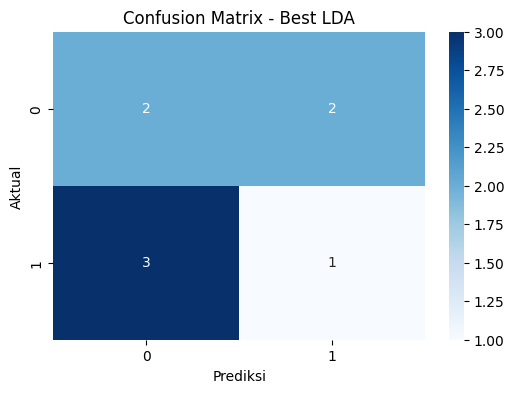

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset
df = pd.read_csv("../Data/time-domain-cancer.csv")

print("Preview dataset:")
print(df.head())
print("\nInfo:")
print(df.info())

# 2. Pisahkan fitur (X) dan label (y)
X = df[["SDNN", "rMSSD", "pNN50"]]  # Fitur
y = df["Class"]

# Jika target berupa string
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)
    class_names = le.classes_
    print("Mapping kelas:", dict(zip(le.classes_, le.transform(le.classes_))))
else:
    class_names = np.unique(y)

# 3. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Normalisasi
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. GridSearch
param_grid = [
    {"solver": ["svd"]},
    {"solver": ["lsqr", "eigen"], "shrinkage": [None, "auto"]}
]

grid = GridSearchCV(
    LinearDiscriminantAnalysis(),
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best CV Score (Train):", grid.best_score_)

# Gunakan model terbaik
best_lda = grid.best_estimator_
y_pred = best_lda.predict(X_test)

# 6. Evaluasi
print("Akurasi (Test):", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - Best LDA")
plt.show()


Freq

Preview dataset:


      LF     HF  LF/HF Ratio  Class
0   80.0   58.0     1.379310      1
1  245.0  200.0     1.225000      1
2  443.0  168.0     2.636905      1
3   58.0   31.0     1.870968      1
4  154.7   45.5     3.400000      1

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LF           37 non-null     float64
 1   HF           37 non-null     float64
 2   LF/HF Ratio  37 non-null     float64
 3   Class        37 non-null     int64  
dtypes: float64(3), int64(1)
memory usage: 1.3 KB
None
Best Params: {'shrinkage': 'auto', 'solver': 'lsqr'}
Best CV Score (Train): 0.5866666666666667
Akurasi (Test): 0.5

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.50      0.75      0.60         4

    accuracy                           0.50         8
   macro 

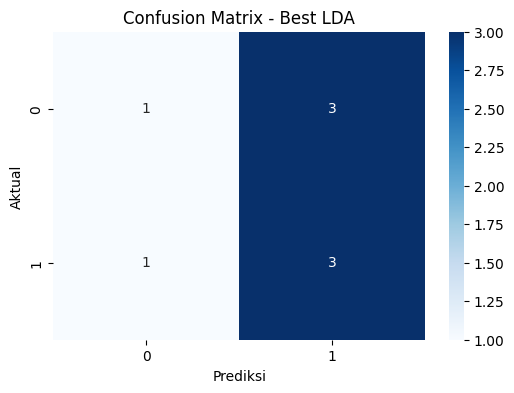

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset
df = pd.read_csv("../Data/freq-domain-cancer.csv")

print("Preview dataset:")
print(df.head())
print("\nInfo:")
print(df.info())

# 2. Pisahkan fitur (X) dan label (y)
X = df[["LF", "HF", "LF/HF Ratio"]]  # Fitur
y = df["Class"]

# Jika target berupa string
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)
    class_names = le.classes_
    print("Mapping kelas:", dict(zip(le.classes_, le.transform(le.classes_))))
else:
    class_names = np.unique(y)

# 3. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Normalisasi
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. GridSearch
param_grid = [
    {"solver": ["svd"]},
    {"solver": ["lsqr", "eigen"], "shrinkage": [None, "auto"]}
]

grid = GridSearchCV(
    LinearDiscriminantAnalysis(),
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best CV Score (Train):", grid.best_score_)

# Gunakan model terbaik
best_lda = grid.best_estimator_
y_pred = best_lda.predict(X_test)

# 6. Evaluasi
print("Akurasi (Test):", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - Best LDA")
plt.show()


Combine

Preview dataset:
      LF     HF  LF/HF Ratio  SDNN  rMSSD  pNN50  Class
0   80.0   58.0     1.379310    54     19      1      1
1  245.0  200.0     1.225000   158     36     15      1
2  443.0  168.0     2.636905   129     24      4      1
3   58.0   31.0     1.870968    62     13      0      1
4  154.7   45.5     3.400000   101     18      1      1

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LF           37 non-null     float64
 1   HF           37 non-null     float64
 2   LF/HF Ratio  37 non-null     float64
 3   SDNN         37 non-null     int64  
 4   rMSSD        37 non-null     int64  
 5   pNN50        37 non-null     int64  
 6   Class        37 non-null     int64  
dtypes: float64(3), int64(4)
memory usage: 2.2 KB
None
Best Params: {'shrinkage': 'auto', 'solver': 'lsqr'}
Best CV Score (Train): 0.5933333333333334
Akurasi (T

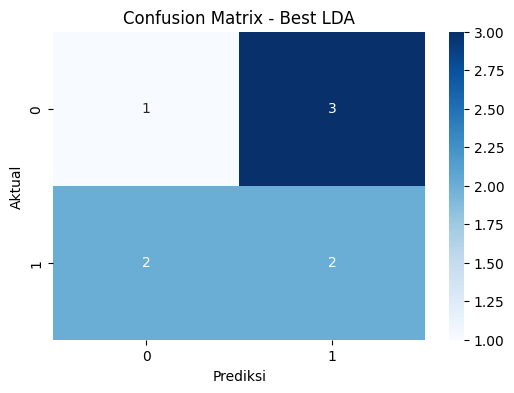

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset
df = pd.read_csv("../Data/combine-feature.csv")

print("Preview dataset:")
print(df.head())
print("\nInfo:")
print(df.info())

# 2. Pisahkan fitur (X) dan label (y)
X = df[["LF", "HF", "LF/HF Ratio", "SDNN", "rMSSD", "pNN50"]]  # Fitur
y = df["Class"]

# Jika target berupa string
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)
    class_names = le.classes_
    print("Mapping kelas:", dict(zip(le.classes_, le.transform(le.classes_))))
else:
    class_names = np.unique(y)

# 3. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Normalisasi
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. GridSearch
param_grid = [
    {"solver": ["svd"]},
    {"solver": ["lsqr", "eigen"], "shrinkage": [None, "auto"]}
]

grid = GridSearchCV(
    LinearDiscriminantAnalysis(),
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best CV Score (Train):", grid.best_score_)

# Gunakan model terbaik
best_lda = grid.best_estimator_
y_pred = best_lda.predict(X_test)

# 6. Evaluasi
print("Akurasi (Test):", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - Best LDA")
plt.show()
